---

In [36]:
print(1)

1


In [37]:
# Core
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Utilities
from pathlib import Path

# Scikit-learn: preprocessing + pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Statsmodels: OLS
import statsmodels.api as sm

# Scikit-learn: linear models (OLS, ridge, lasso, elastic net)
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

# Scikit-learn: model selection (CV)
from sklearn.model_selection import KFold, TimeSeriesSplit, GridSearchCV

# Scikit-learn: metrics
from sklearn.metrics import r2_score

# Scikit-learn: nonlinear features (RBF)
from sklearn.kernel_approximation import RBFSampler

# Scikit-learn: alternative methods for part (g)
from sklearn.kernel_ridge import KernelRidge
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import GradientBoostingRegressor

---

# **Question 1**

Download the file gw.csv from canvas. 

This file contains monthly S&P 500 index returns along with a series of predictors used to forecast the market. 

The S&P returns are offset by one month from the predictors. 

In the first part of the problem set we will explore how well we can forecast market returns using machine learning methods

In [38]:
# Load gw.csv

gw_df = pd.read_csv(r'gw.csv', index_col='yyyymm')
gw_df.index = pd.to_datetime(gw_df.index, format='%Y%m')

display(gw_df.head())
display(gw_df.tail())

,dfy_lag1,infl_lag1,svar_lag1,de_lag1,lty_lag1,tms_lag1,tbl_lag1,dfr_lag1,dp_lag1,dy_lag1,ltr_lag1,ep_lag1,b/m_lag1,ntis_lag1,CRSP_SPvw_minus_Rfree
yyyymm,,,,,,,,,,,,,,,
1927-01-01,0.0100,0.000000,0.000465,-0.586175,0.0354,0.0047,0.0307,-0.0022,-2.973012,-2.956570,0.0078,-2.386837,0.441476,0.050876,-0.005410
1927-02-01,0.0095,-0.011299,0.000470,-0.567601,0.0351,0.0028,0.0323,-0.0019,-2.942374,-2.963349,0.0075,-2.374773,0.443706,0.050824,0.042922
1927-03-01,0.0092,-0.005714,0.000287,-0.549182,0.0347,0.0018,0.0329,-0.0019,-2.979535,-2.932946,0.0088,-2.430353,0.428501,0.051668,0.004324
1927-04-01,0.0092,-0.005747,0.000924,-0.531456,0.0331,0.0011,0.0320,-0.0170,-2.976535,-2.970053,0.0253,-2.445079,0.469765,0.046357,0.010521
1927-05-01,0.0090,0.000000,0.000603,-0.512916,0.0333,-0.0006,0.0339,0.0060,-2.984225,-2.967143,-0.0005,-2.471309,0.456754,0.050514,0.059353


,dfy_lag1,infl_lag1,svar_lag1,de_lag1,lty_lag1,tms_lag1,tbl_lag1,dfr_lag1,dp_lag1,dy_lag1,ltr_lag1,ep_lag1,b/m_lag1,ntis_lag1,CRSP_SPvw_minus_Rfree
yyyymm,,,,,,,,,,,,,,,
2020-08-01,0.0117,0.005058,0.001608,-0.509646,0.0062,0.0049,0.0013,0.0323,-4.008492,-3.954855,0.0287,-3.498846,0.253848,-0.011998,0.071968
2020-09-01,0.0102,0.003153,0.000743,-0.510916,0.0065,0.0055,0.0010,-0.0139,-4.080892,-4.013173,-0.0349,-3.569975,0.235975,-0.008504,-0.038251
2020-10-01,0.0105,0.001393,0.004907,-0.512197,0.0068,0.0057,0.0011,-0.0039,-4.045576,-4.085594,0.0080,-3.533379,0.241482,-0.005698,-0.026509
2020-11-01,0.0109,0.000415,0.003661,-0.501467,0.0079,0.0069,0.0010,0.0048,-4.020767,-4.048823,-0.0238,-3.519301,0.253146,-0.001895,0.109303
2020-12-01,0.0100,-0.000611,0.002492,-0.490549,0.0087,0.0078,0.0009,0.0416,-4.126172,-4.024025,0.0093,-3.635623,0.226352,-0.005262,0.041473


---

### **Part (a)**

**(i)** For each of the predictors, regress the S&P 500 index returns on the predictor using the
full sample of data. 

In [39]:
# Full-sample univariate OLS for each predictor

predictors_df = gw_df.drop(columns=['CRSP_SPvw_minus_Rfree'])
regressions = {}
r2 = {}
for col in predictors_df.columns:
    X = sm.add_constant(predictors_df[col])
    Y = gw_df['CRSP_SPvw_minus_Rfree']
    model = sm.OLS(Y, X, missing='drop').fit()
    regressions[col] = model
    r2[col] = model.rsquared

**(ii)** Report the $R^2$ of these regressions. 

In [40]:
# Full-sample in-sample R^2 for each univariate regression

r2_df = pd.DataFrame(r2, index=['R^2']).T.sort_values(by='R^2', ascending=False)
r2_df


,R^2
b/m_lag1,0.006005
ntis_lag1,0.004855
dy_lag1,0.004023
tbl_lag1,0.003436
ep_lag1,0.003258
dp_lag1,0.002990
dfy_lag1,0.002671
infl_lag1,0.002639
ltr_lag1,0.002437
lty_lag1,0.002113


**(iii)** Next, evaluate the out-of-sample performance of each predictor individually using an expanding sample of data starting in
1965. 

In [41]:
# Expanding-window OOS forecasts (start in 1965)

import warnings
warnings.filterwarnings("ignore")

predictors_1965_present_df = predictors_df.loc['1965-01-01':]
gw_df_1965_present = gw_df.loc['1965-01-01':]

start = "1965-01-01"
predictions = pd.DataFrame(index = gw_df.index, columns= gw_df.columns )[start:].drop(columns='CRSP_SPvw_minus_Rfree')

#for each predictor train up to one period before, predict next period, train again included the last period predicted, predict following step, continue till end
for col in predictors_df.columns:
    for t in range(456, len(gw_df)):
        step_ahead = gw_df.index[t]
        X = sm.add_constant(predictors_df[col][:t-1])
        Y = gw_df['CRSP_SPvw_minus_Rfree'][:t-1]
        model = sm.OLS(Y,X,missing='drop').fit()
        X_pred = sm.add_constant(predictors_df[[col]].loc[[step_ahead]], has_constant="add")
        predictions.loc[step_ahead, col] = model.predict(X_pred).iloc[0]
predictions #result in a dataframe of one step ahead predictions using an expanding training set

,dfy_lag1,infl_lag1,svar_lag1,de_lag1,lty_lag1,tms_lag1,tbl_lag1,dfr_lag1,dp_lag1,dy_lag1,ltr_lag1,ep_lag1,b/m_lag1,ntis_lag1
yyyymm,,,,,,,,,,,,,,
1965-01-01,0.006165,0.009306,0.007822,0.01118,0.003934,0.007468,0.005005,0.009329,0.001142,-0.001593,0.008884,0.001509,-0.000219,0.010111
1965-02-01,0.006148,0.009293,0.007747,0.011195,0.003956,0.007468,0.005027,0.009185,0.000728,-0.001501,0.008741,0.000989,-0.000973,0.011499
1965-03-01,0.006254,0.009344,0.007886,0.011299,0.004158,0.007468,0.00508,0.008879,0.001097,-0.001803,0.009124,0.00137,-0.000867,0.012386
1965-04-01,0.0062,0.00837,0.007787,0.011308,0.0042,0.007405,0.005038,0.008571,0.001432,-0.001614,0.008595,0.001905,-0.000954,0.011189
1965-05-01,0.006142,0.008321,0.007728,0.011277,0.004005,0.007273,0.004841,0.008728,0.000889,-0.001241,0.008771,0.001327,-0.001843,0.012314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,0.006863,0.005252,0.006496,0.006747,0.010299,0.004578,0.009875,0.009953,0.002388,0.00212,0.009262,0.000474,0.001592,0.010689
2020-09-01,0.006291,0.006315,0.006415,0.006798,0.010417,0.004763,0.009993,0.005216,0.002024,0.001783,0.002374,0.000102,0.001412,0.010284
2020-10-01,0.006471,0.007297,0.007037,0.006864,0.010582,0.004905,0.0101,0.006286,0.002441,0.001394,0.00711,0.000675,0.001649,0.009985


In [42]:
# Out-of-sample R^2 for each univariate expanding-window forecast

oos_r2 = {}
y_true = gw_df_1965_present['CRSP_SPvw_minus_Rfree']
for col in predictions:
    oos_r2[col] = r2_score(y_true, predictions[col])

oosr2_df = pd.DataFrame(oos_r2, index=['OOS R^2']).T.sort_values(by='OOS R^2', ascending=False)
oosr2_df


,OOS R^2
infl_lag1,0.000662
tbl_lag1,-0.000918
dfy_lag1,-0.001008
ltr_lag1,-0.002080
tms_lag1,-0.003045
dfr_lag1,-0.006114
lty_lag1,-0.007719
dp_lag1,-0.007757
svar_lag1,-0.010826
dy_lag1,-0.011801


In [43]:
y = gw_df_1965_present['CRSP_SPvw_minus_Rfree']
ymean = y.expanding().mean().shift(1)
ols_oos_r2 = {}

for col in predictions:
    df = pd.DataFrame({"y": y, "yhat": predictions[col], "ymean": ymean}).dropna()
    ols_oos_r2[col] = 1 - ((df["y"] - df["yhat"])**2).sum() / ((df["y"] - df["ymean"])**2).sum()

ols_oos_r2

{'dfy_lag1': np.float64(0.006508488851917571),
 'infl_lag1': np.float64(0.008047787496837988),
 'svar_lag1': np.float64(-0.0033054575855628876),
 'de_lag1': np.float64(-0.005035214381975406),
 'lty_lag1': np.float64(-6.0805269401775774e-05),
 'tms_lag1': np.float64(0.004434951165164014),
 'tbl_lag1': np.float64(0.0066460540729961215),
 'dfr_lag1': np.float64(0.001318608357256279),
 'dp_lag1': np.float64(2.959173284333705e-05),
 'dy_lag1': np.float64(-0.0038481687303195677),
 'ltr_lag1': np.float64(0.0053405998906718155),
 'ep_lag1': np.float64(-0.011642250080734495),
 'b/m_lag1': np.float64(-0.026566928879852236),
 'ntis_lag1': np.float64(-0.00790084524688428)}

**(iv)** How do the out-of-sample $R^2$ compare to the in-sample $R^2$?

The out-of-sample $R^2$ are substantially lower than the in-sample $R^2$.

In-sample, all predictors have small positive $R^2$ values. 

Out-of-sample, most predictors have $R^2$ values that are near zero or negative, and even the best predictor has only a very small positive out-of-sample $R^2$.

**(v)** Interpret what this means for the usefulness of these predictors in forecasting the market

These results suggest that the individual predictors are not very useful for forecasting the market in real time.

Although they show small positive fit in-sample, their out-of-sample performance is mostly near zero or negative, meaning that using them to form forecasts generally does not improve on a simple historical-mean forecast and often makes it worse. 

This indicates that whatever relationships appear in-sample are weak, unstable, or largely driven by noise rather than persistent predictive signal.

---

### **Part (b)**

**(i)** Next, try the same expanding sample exercise but include all the predictors in a single regression

In [44]:
# Expanding-window OOS forecasts using ALL predictors in one regression

yhat = pd.DataFrame(index=predictions.index, columns = ["Y_hat"])
for t in range(456, len(gw_df)):
    step_ahead = gw_df.index[t]
    X = sm.add_constant(predictors_df[:t-1])
    Y = gw_df['CRSP_SPvw_minus_Rfree'][:t-1]
    model = sm.OLS(Y,X,missing='drop').fit()

    X_pred = sm.add_constant(predictors_df.loc[[step_ahead]], has_constant="add")
    yhat.loc[step_ahead] = model.predict(X_pred).iloc[0]
yhat #result in a dataframe of one step ahead predictions using an expanding training set


,Y_hat
yyyymm,
1965-01-01,0.006428
1965-02-01,0.008224
1965-03-01,0.005056
1965-04-01,0.000247
1965-05-01,0.005189
...,...
2020-08-01,0.015324
2020-09-01,-0.001978
2020-10-01,0.001024


In [45]:
# Out-of-sample R^2 for the multivariate expanding-window forecast

r2_score(gw_df_1965_present['CRSP_SPvw_minus_Rfree'],yhat["Y_hat"])


-0.09131115295080972

**(ii)** Compare the out-of-sample $R^2$ here to those in part (a). 

The multivariate regression with all predictors performs worse out of sample than the univariate forecasts in part (a).

In part (a), the best individual predictor had an out-of-sample $R^2$ close to zero (slightly positive) and most others were only mildly negative. 

Here, the all-predictors regression produces an out-of-sample $R^2$ of about $-0.086$, which is much more negative than any of the univariate models.


**(iii)** Let’s now incorporate a penalty term into the regression to counteract overfitting. 

Compute results for lasso, ridge, and elastic net and use K-fold cross-validation to select the optimal penalty term.

In [46]:
# Ridge
#take the data through 1964 run GridSearch Ridge, predict next month, do it again until you're at the end
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Ridge())
])

param_grid = {"model__alpha": np.logspace(-3, 3, 20)}

tscv = TimeSeriesSplit(n_splits=5)

ridge_yhat = pd.DataFrame(index=predictions.index, columns = ["Y_hat"])

for t in range(456, len(gw_df)):
    step_ahead = gw_df.index[t]
    X_train = predictors_df[:t-1]
    Y_train = gw_df['CRSP_SPvw_minus_Rfree'][:t-1]
    gs = GridSearchCV(pipe, param_grid, cv=tscv, scoring="neg_mean_squared_error", n_jobs =-1)
    gs.fit(X_train, Y_train)
    ridge_yhat.loc[step_ahead] = gs.predict(predictors_df.iloc[[t]])[0]

ridge_yhat

,Y_hat
yyyymm,
1965-01-01,0.004728
1965-02-01,0.004654
1965-03-01,0.005089
1965-04-01,0.004296
1965-05-01,0.004353
...,...
2020-08-01,0.008376
2020-09-01,-0.000046
2020-10-01,0.004244


In [47]:
#Lasso
#take the data through 1964 run GridSearch Lasso, predict next month, do it again until you're at the end
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", Lasso(max_iter=5000))
])

param_grid = {"model__alpha": np.logspace(-3, 3, 20)}

tscv = TimeSeriesSplit(n_splits=5)

lasso_yhat = pd.DataFrame(index=predictions.index, columns = ["Lasso_Y_hat"])

for t in range(456, len(gw_df)):
    step_ahead = gw_df.index[t]
    X_train = predictors_df[:t-1]
    Y_train = gw_df['CRSP_SPvw_minus_Rfree'][:t-1]
    gs = GridSearchCV(pipe, param_grid, cv=tscv, scoring="neg_mean_squared_error", n_jobs =-1)
    gs.fit(X_train, Y_train)
    lasso_yhat.loc[step_ahead] = gs.predict(predictors_df.iloc[[t]])[0]

lasso_yhat

,Lasso_Y_hat
yyyymm,
1965-01-01,0.008931
1965-02-01,0.008916
1965-03-01,0.008967
1965-04-01,0.008949
1965-05-01,0.008895
...,...
2020-08-01,0.006667
2020-09-01,0.006711
2020-10-01,0.00677


In [48]:
#Elastic_Net
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", ElasticNet(max_iter=5000))
])

param_grid = {
    "model__alpha": np.logspace(-3, 3, 20),
    "model__l1_ratio": [0.2, 0.5, 0.8]  # 1.0 = lasso
}

tscv = TimeSeriesSplit(n_splits=5)

EN_yhat = pd.DataFrame(index=predictions.index, columns = ["EN_Y_hat"])

for t in range(456, len(gw_df)):
    step_ahead = gw_df.index[t]
    X_train = predictors_df[:t-1]
    Y_train = gw_df['CRSP_SPvw_minus_Rfree'][:t-1]
    gs = GridSearchCV(pipe, param_grid, cv=tscv, scoring="neg_mean_squared_error", n_jobs =-1)
    gs.fit(X_train, Y_train)
    EN_yhat.loc[step_ahead] = gs.predict(predictors_df.iloc[[t]])[0]

EN_yhat

,EN_Y_hat
yyyymm,
1965-01-01,0.008931
1965-02-01,0.008916
1965-03-01,0.008967
1965-04-01,0.008949
1965-05-01,0.008895
...,...
2020-08-01,0.006667
2020-09-01,0.006711
2020-10-01,0.00677


In [49]:
#combined dataframe
ridge_yhat = ridge_yhat.rename(columns={"Y_hat": "Ridge_Y_hat"})
yhat = yhat.rename(columns={"Y_hat": "OLS_Y_hat"})
return_yhat = pd.concat(
    [yhat, ridge_yhat, lasso_yhat, EN_yhat],
    axis=1
)
return_yhat

,OLS_Y_hat,Ridge_Y_hat,Lasso_Y_hat,EN_Y_hat
yyyymm,,,,
1965-01-01,0.006428,0.004728,0.008931,0.008931
1965-02-01,0.008224,0.004654,0.008916,0.008916
1965-03-01,0.005056,0.005089,0.008967,0.008967
1965-04-01,0.000247,0.004296,0.008949,0.008949
1965-05-01,0.005189,0.004353,0.008895,0.008895
...,...,...,...,...
2020-08-01,0.015324,0.008376,0.006667,0.006667
2020-09-01,-0.001978,-0.000046,0.006711,0.006711
2020-10-01,0.001024,0.004244,0.00677,0.00677


**(iv)** Plot the out-of-sample $R^2$ for each month for each of the three methods along with the un-penalized regression. 

In [50]:
# code
try:
    return_yhat
except NameError:
    return_yhat = pd.read_csv("Andrew_yhats.csv", index_col=0, parse_dates=True)

y = gw_df["CRSP_SPvw_minus_Rfree"]

# expanding historical mean, lagged so it is truly OOS
y_mean_hat = y.expanding().mean().shift(1)

df = return_yhat.copy()
df["y_true"] = y
df["y_mean_hat"] = y_mean_hat

df = df.dropna()


oos_r2 = pd.DataFrame(index=df.index)

for col in return_yhat.columns:
    err_model = (df["y_true"] - df[col])**2
    err_bench = (df["y_true"] - df["y_mean_hat"])**2

    oos_r2[col.replace("_Y_hat", "_R2_oos")] = (
        1 - err_model.cumsum() / err_bench.cumsum()
    )

oos_r2

,OLS_R2_oos,Ridge_R2_oos,Lasso_R2_oos,EN_R2_oos
yyyymm,,,,
1965-01-01,-0.227264,-0.395949,0.001293,0.001293
1965-02-01,-0.182219,-0.264165,0.002526,0.002526
1965-03-01,0.056294,0.014627,0.000517,0.000517
1965-04-01,-0.234336,-0.124592,0.001791,0.001791
1965-05-01,-0.157487,-0.051177,0.002362,0.002362
...,...,...,...,...
2020-08-01,-0.088121,0.000599,-0.000096,-0.000096
2020-09-01,-0.087417,0.001047,-0.000092,-0.000092
2020-10-01,-0.087066,0.001172,-0.000094,-0.000094


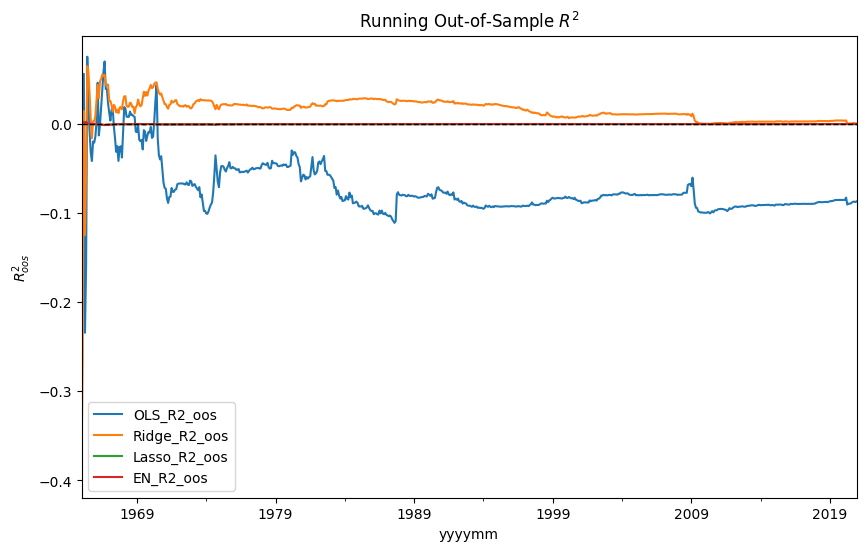

In [51]:
oos_r2.plot(figsize=(10,6))
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.title("Running Out-of-Sample $R^2$")
plt.ylabel("$R^2_{oos}$")
plt.show()

**(v)** How do the methods compare? 

Overall, the OOS R^2 was near or below zero across all mode. The regularized models tended to have a more stable OOS R^2 compared to the volatility seen in the OLS OOS R^2. Regarding the regularized models, both Lasso and Elastic-Net produced similar results and the most stable OOS R^2 of virtually 0 for all periods, whereas the Ridge regression had success in creating a non-zero R^2 in earlier periods. However, the Ridge performance trended back to zero after the Great Financial Crisis, potentially pointing to post 2008 dynamics that may require different modeling.

**(vi)** What does this tell us about the predictability of market returns?

Given the lack of R^2 much different from zero, or even negative, the models do as well or worse in most cases than the historical mean. Ridge showed some potential for a minimal improvement on the mean forecast, but that the Ridge OOS R^2 tended to zero in recent periods.

---

### **Part (c)**

**(i)** Introduce non-linearities into the model by using the radial basis function kernel to generate non-linear expansions of the predictor set.

Use `RBFSampler` from `sklearn`.

Generate these features for a number of different feature counts.

In [52]:
y = gw_df["CRSP_SPvw_minus_Rfree"]
X = predictors_df

alpha_grid = np.logspace(-1, 1, 5)
tscv = TimeSeriesSplit(n_splits=5)

feature_counts = [10,200,1000,2000]
oos_r2_by_k = {}


for k in feature_counts:
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("rbf", RBFSampler(gamma=1.0, n_components=k, random_state=42)),
        ("model", Ridge())
    ])

    param_grid = {"model__alpha": alpha_grid}

    yhat = pd.Series(index=gw_df.index, dtype=float)
    ymean = y.expanding().mean().shift(1)  # benchmark forecast


    for t in range(456, len(gw_df)):
        step_ahead = gw_df.index[t]
        X_train = predictors_df[:t-1]
        Y_train = gw_df['CRSP_SPvw_minus_Rfree'][:t-1]
        gs = GridSearchCV(pipe, param_grid, cv=tscv, scoring="neg_mean_squared_error", n_jobs=-1)
        gs.fit(X_train, Y_train)
        X_pred = X.iloc[[t]]
        yhat.iloc[t] = gs.predict(X_pred)[0]

    # compute overall OOS R^2 for this k
    df = pd.DataFrame({"y": y, "yhat": yhat, "ymean": ymean}).dropna()
    sse_model = ((df["y"] - df["yhat"])**2).sum()
    sse_bench = ((df["y"] - df["ymean"])**2).sum()
    oos_r2_by_k[k] = 1 - sse_model / sse_bench

oos_r2_by_k


{10: np.float64(-0.021424891728278883),
 200: np.float64(-0.023240288361775496),
 1000: np.float64(0.006705781512427733),
 2000: np.float64(-0.00011795547924209338)}

**(iii)** Plot the out-of-sample $R^2$ as a function of the number of features generated by the kernel.

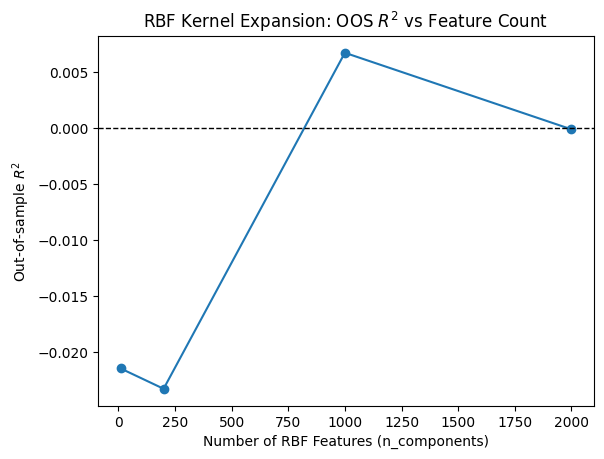

In [53]:
import matplotlib.pyplot as plt

ks = list(oos_r2_by_k.keys())
vals = [oos_r2_by_k[k] for k in ks]

plt.plot(ks, vals, marker="o")
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.xlabel("Number of RBF Features (n_components)")
plt.ylabel("Out-of-sample $R^2$")
plt.title("RBF Kernel Expansion: OOS $R^2$ vs Feature Count")
plt.show()

**(iv)** How do the results compare to the linear models? Interpret the importance of the number of features in the kernel expansion.

In [54]:
df = oos_r2.loc["2020-12-01"]
df["RDF_1000_R^2"] = oos_r2_by_k[1000]
df

OLS_R2_oos     -0.086974
Ridge_R2_oos    0.000627
Lasso_R2_oos   -0.000093
EN_R2_oos      -0.000093
RDF_1000_R^2    0.006706
Name: 2020-12-01 00:00:00, dtype: object

The RBF model with 1000 features produced the highest OOS R^2 when trained on the full sample. However, given the closeness of these results to zero, the usefulness of the model is still questionable. When comparing the OOS R^2 by the number of features, the model started with little usefulness with a small number of features but increased dramatically up to 1000 features before leveling off. 